# Testing Performance of Training Dataset Through Time

In [1]:
import import_ipynb

In [2]:
import metrics

importing Jupyter notebook from metrics.ipynb


In [3]:
from metrics import *

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [5]:
def train_splitter(df, period=3):
    train_df = df.loc[ df['Month'] <= period, :]
    test_df = df.loc[ df['Month'] == period+1, :]

    print('time period is set as ====>  {}'.format(period))
    print('Size of Train: ', train_df.shape)
    print('Size of Test: ', test_df.shape)

    return train_df, test_df

In [6]:
dfs = pd.read_csv('./processed.csv')
train = pd.read_csv('./train.csv')
# test = pd.read_csv('./test.csv')
train.shape

(75000, 23)

In [7]:
display(train.head(8))

,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576,1,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,26.822620,1,1,49.574949,21.465380,2,312.494089,2
1,576,2,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,31.944960,1,1,49.574949,21.465380,3,284.629162,2
2,576,3,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,28.609352,1,1,49.574949,21.465380,4,331.209863,2
3,576,4,3,12,7.509249,3.0,4.0,3.0,0,5.0,...,2,28.460148,31.377862,1,1,49.574949,21.465380,5,223.451310,2
4,576,5,3,12,7.509249,3.0,4.0,3.0,0,6.0,...,2,28.460148,24.797347,1,1,49.574949,21.465380,1,341.489231,2
5,576,6,3,12,7.509249,3.0,4.0,3.0,0,8.0,...,2,28.460148,27.262259,1,1,49.574949,21.465380,1,340.479212,2
6,1822,1,3,13,8.018950,2.0,4.0,6.0,0,3.0,...,2,24.597358,24.464031,1,1,18.816215,39.684018,5,470.690627,1
7,1822,2,3,13,8.018950,2.0,4.0,6.0,0,7.0,...,2,24.597358,38.550848,1,1,18.816215,39.684018,0,484.591214,2


## Train - 1~3월 & Test - 4월

In [8]:
train_df, test_df = train_splitter(train, period=3)

time period is set as ====>  3
Size of Train:  (37500, 23)
Size of Test:  (12500, 23)


In [9]:
display(train_df)

,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576,1,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,26.822620,1,1,49.574949,21.465380,2,312.494089,2
1,576,2,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,31.944960,1,1,49.574949,21.465380,3,284.629162,2
2,576,3,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,28.609352,1,1,49.574949,21.465380,4,331.209863,2
6,1822,1,3,13,8.018950,2.0,4.0,6.0,0,3.0,...,2,24.597358,24.464031,1,1,18.816215,39.684018,5,470.690627,1
7,1822,2,3,13,8.018950,2.0,4.0,6.0,0,7.0,...,2,24.597358,38.550848,1,1,18.816215,39.684018,0,484.591214,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74989,8346,2,3,1,7.565227,10.0,8.0,29.0,1,33.0,...,0,59.763701,39.772607,0,2,60.964772,34.662906,5,273.750662,0
74990,8346,3,3,1,7.565227,10.0,8.0,29.0,1,33.0,...,0,59.763701,24.713861,0,2,60.964772,34.662906,5,345.743101,0
74994,9254,1,3,9,8.119522,4.0,6.0,7.0,0,23.0,...,2,22.413835,32.991333,1,1,35.104023,24.028477,5,189.641080,0
74995,9254,2,3,9,8.119522,4.0,6.0,7.0,0,23.0,...,2,22.413835,29.135447,1,1,35.104023,24.028477,4,400.104466,1


In [10]:
target = 'Credit_Score'
# cat_col = ['Customer_ID', 'Month', 'Credit_Mix', 'Credit_History_Age',
#            'Payment_of_Min_Amount', 'Payment_Behaviour']

cat_col = ['Customer_ID', 'Credit_Mix', 'Credit_History_Age',
           'Payment_of_Min_Amount', 'Payment_Behaviour']

cat_dims = {}
for col in cat_col:
    cat_dims[col] = len(list(dfs[col].unique()))
    print(col, ': ', cat_dims[col])
cat_col_idx = [list(dfs.columns).index(col) for col in cat_col]
cat_col_dims = [cat_dims[col] for col in cat_col]
all_col_list = [col for col in dfs.columns if col !=target]

Customer_ID :  12500
Credit_Mix :  3
Credit_History_Age :  2
Payment_of_Min_Amount :  3
Payment_Behaviour :  6


In [11]:
x_train = train_df.loc[:, all_col_list].values
y_train = train_df.loc[:, target].values
x_test = test_df.loc[:, all_col_list].values
y_test = test_df.loc[:, target].values

In [12]:
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def roc_curve_plot(x_test, y_test, model):

    y_test = pd.get_dummies(y_test).values
    # make sample data
    n_classes = 3

    clf = model
    y_score = clf.predict_proba(x_test)

    # ROC & AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    class_name = ['Poor','Standard','Good']
    plt.figure(figsize=(15, 5))
    for idx, i in enumerate(range(n_classes)):
        plt.subplot(131+idx)
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Class :{class_name[idx]}')
        plt.legend(loc="lower right")
    plt.show()

    print("roc_auc_score: ", roc_auc_score(y_test, y_score, multi_class='raise'))

In [14]:
def show_results(pipeline, x_train, y_train, x_test, y_test):
    """

    :param pipeline: learned object
    :param x_train: x train input
    :param y_train: y train
    :param x_test: x test input
    :param y_test: y test
    :return: None
    """
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

    y_train_pred = pipeline.predict(x_train)
    y_test_pred = pipeline.predict(x_test)

    print('Accuracy Score (Train): ', accuracy_score(y_train, y_train_pred))
    print('Accuracy Score (Test): ', accuracy_score(y_test, y_test_pred))

    print('Classification Report....: ')
    print(classification_report(y_test, y_test_pred))

    print('Confusion Matrix...: ')
    print(confusion_matrix(y_test, y_test_pred))

In [15]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

In [16]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [17]:
y_pred = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)

In [18]:
y_proba = rfc.predict_proba(x_test)
y_proba

y_proba_train = rfc.predict_proba(x_train)
y_proba_train

array([[0.01, 0.1 , 0.89],
       [0.  , 0.04, 0.96],
       [0.  , 0.1 , 0.9 ],
       ...,
       [0.8 , 0.14, 0.06],
       [0.26, 0.71, 0.03],
       [0.79, 0.15, 0.06]])

### Single Metrics

In [19]:
print('훈련 데이터 Accuracy : ', rfc.score(x_train, y_train))
print('평가 데이터 Accuracy: ', rfc.score(x_test, y_test))

훈련 데이터 Accuracy :  0.9999733333333334
평가 데이터 Accuracy:  0.75616


In [20]:
show_results(rfc, x_train, y_train, x_test, y_test)

Accuracy Score (Train):  0.9999733333333334
Accuracy Score (Test):  0.75616
Classification Report....: 
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      3670
           1       0.77      0.77      0.77      6473
           2       0.73      0.68      0.71      2357

    accuracy                           0.76     12500
   macro avg       0.75      0.74      0.75     12500
weighted avg       0.76      0.76      0.76     12500

Confusion Matrix...: 
[[2895  748   27]
 [ 964 4957  552]
 [  19  738 1600]]




================ Poor  vs other score ==================
   True_Posit :     2895
   True_Negat :     6557
   False_Posi :     0983
   False_Nega :     2065
       recall :   0.5837
    precision :   0.7465
     accuracy :   0.7562
     f1_score :   0.6551
confusion_mat
 [[2895 2065]
 [ 983 6557]] 



================ Standard  vs other score ==================
   True_Posit :     4957
   True_Negat :     4495
   False_Posi :     1486
   False_Nega :     1562
       recall :   0.7604
    precision :   0.7694
     accuracy :   0.7562
     f1_score :   0.7649
confusion_mat
 [[4957 1562]
 [1486 4495]] 



================ Good  vs other score ==================
   True_Posit :     1600
   True_Negat :     7852
   False_Posi :     0579
   False_Nega :     2469
       recall :   0.3932
    precision :   0.7343
     accuracy :   0.7562
     f1_score :   0.5122
confusion_mat
 [[1600 2469]
 [ 579 7852]] 



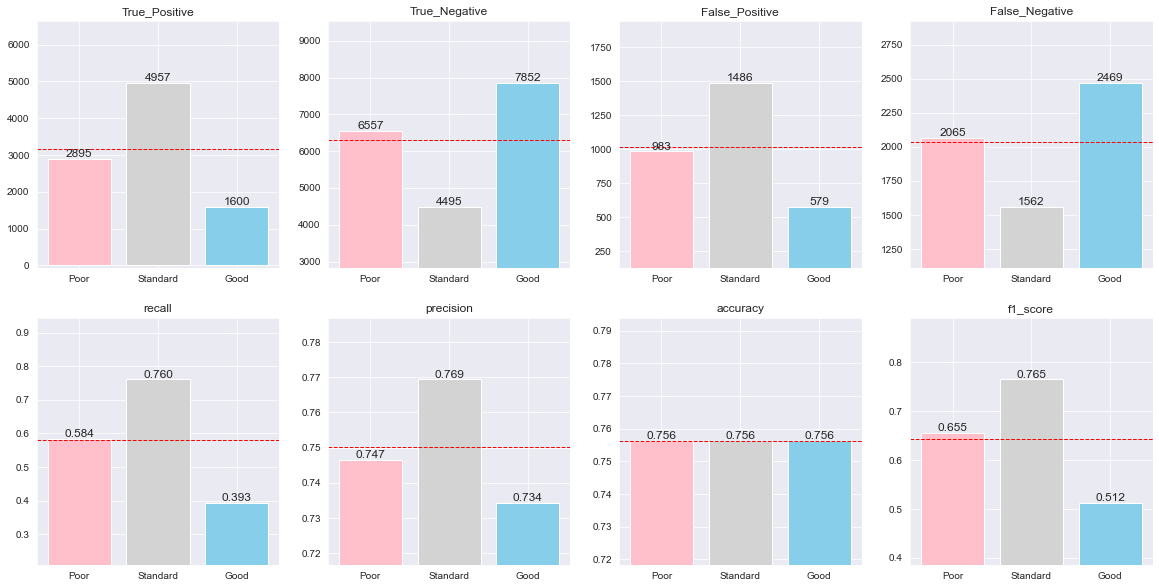

In [21]:
show_metrics(x_test, y_test, rfc)

### AUROC "ovr" 방법

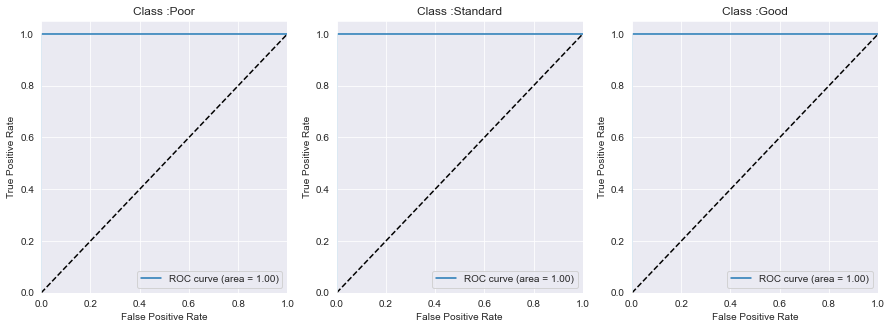

roc_auc_score:  1.0


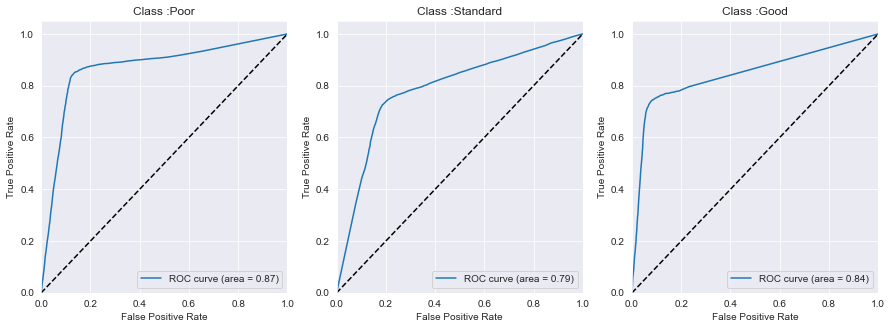

roc_auc_score:  0.8328248095930038


In [22]:
roc_curve_plot(x_train, y_train, rfc)

roc_curve_plot(x_test, y_test, rfc)

### AUROC OvO 방법

ovo + average='macro' << relatively insensitive to imbalance

**reference**:
- https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb
- https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a

In [23]:
def calculate_tpr_fpr(y_real, y_pred):
    """
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations

    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes

    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    """

    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

    return tpr, fpr

def get_all_roc_coordinates(y_real, y_proba):
    """
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.

    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.

    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    """
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

def plot_roc_curve(tpr, fpr, scatter=True, ax=None):
    """
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).

    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    """
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()

    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [24]:
def roc_auc_ovo_plot(X, y, model):

    y_proba = model.predict_proba(X)

    plt.figure(figsize=(20, 8))
    bins = [i/20 for i in range(20)] + [1]
    roc_auc_ovo = {}
    class_combination = [[0, 1], [1, 0], [0, 2], [2, 0], [1, 2], [2, 1]]
    classes = list(model.classes_)

    for i in range(len(class_combination)):
        # gets the class
        comb = class_combination[i]
        c1 = comb[0]
        c2 = comb[1]
        c1_index = classes.index(c1)
        title = f"{c1} vs {c2}"

        # prepares an auxiliary dataframe
        df_aux = pd.DataFrame(X).copy()
        df_aux['class'] = y
        df_aux['prob'] = y_proba[:, c1_index]

        # slices only the subset with both classes
        df_aux = df_aux[ (df_aux['class'] == c1) | (df_aux['class'] == c2)]
        df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
        df_aux = df_aux.reset_index(drop=True)

        # Plot the probability dist for the class and the rest
        ax = plt.subplot(2, 6, i+1)
        sns.histplot(x="prob", data=df_aux, hue='class', color='b', ax=ax, bins=bins)
        ax.set_title(title)
        ax.legend([f"Class 1: {c1}", f"Class 0: {c2}"])
        ax.set_xlabel(f"P(x = {c1})")

        # Calculates the ROC Coordinates and plots the ROC Curves
        ax_bottom = plt.subplot(2, 6, i+7)
        tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
        plot_roc_curve(tpr, fpr, scatter=False, ax=ax_bottom)
        ax_bottom.set_title("ROC Curve OvO")

        # Calculates the ROC AUC OvO
        roc_auc_ovo[title] = roc_auc_score(df_aux['class'], df_aux['prob'])

    plt.tight_layout()
    plt.show()

    avg_roc_auc = 0
    i = 0
    for k in roc_auc_ovo:
        avg_roc_auc += roc_auc_ovo[k]
        i += 1
        print(f"{k} ROC AUC OvO: {roc_auc_ovo[k]:.4f}")
    print(f"average ROC AUC OvO: {avg_roc_auc/i:.4f}")

    print("sklearn method - average ROC AUC OvO: {:.4f}".format(roc_auc_score(y_true=y, y_score=y_proba, average='macro', multi_class='ovo')))

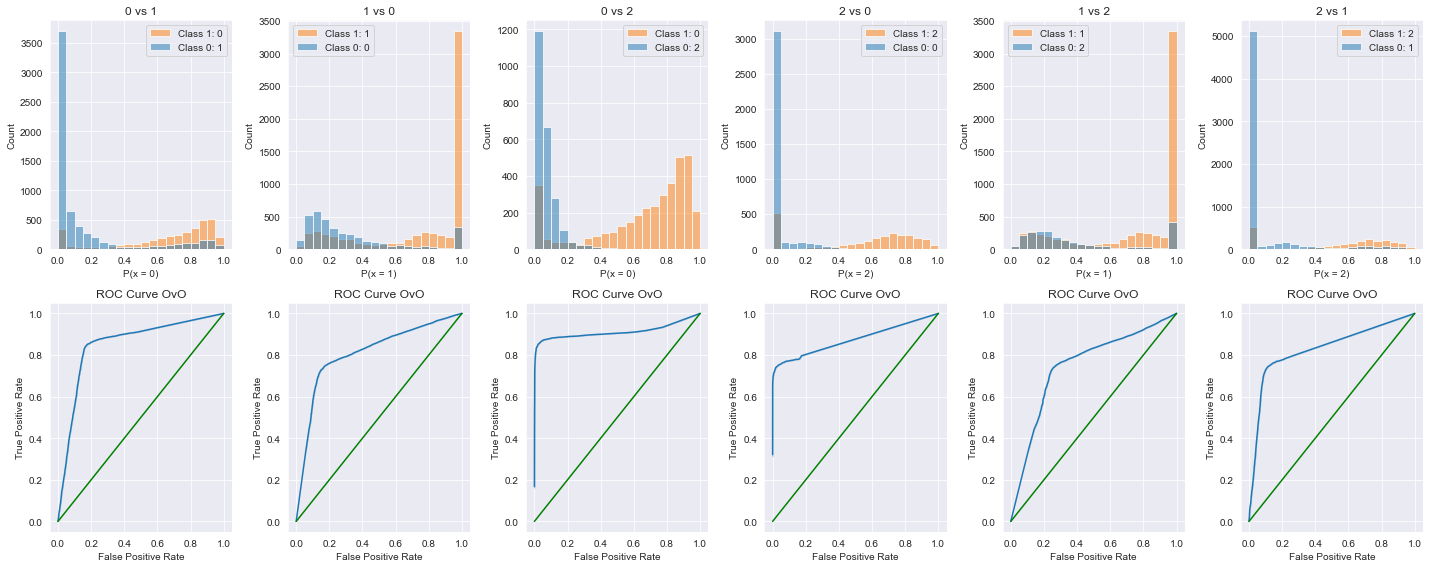

0 vs 1 ROC AUC OvO: 0.8511
1 vs 0 ROC AUC OvO: 0.8106
0 vs 2 ROC AUC OvO: 0.9123
2 vs 0 ROC AUC OvO: 0.8745
1 vs 2 ROC AUC OvO: 0.7477
2 vs 1 ROC AUC OvO: 0.8282
average ROC AUC OvO: 0.8374
sklearn method - average ROC AUC OvO: 0.8374


In [25]:
roc_auc_ovo_plot(x_test, y_test, rfc)

### AUPRC

Average precision score, micro-averaged over all classes: 0.7441


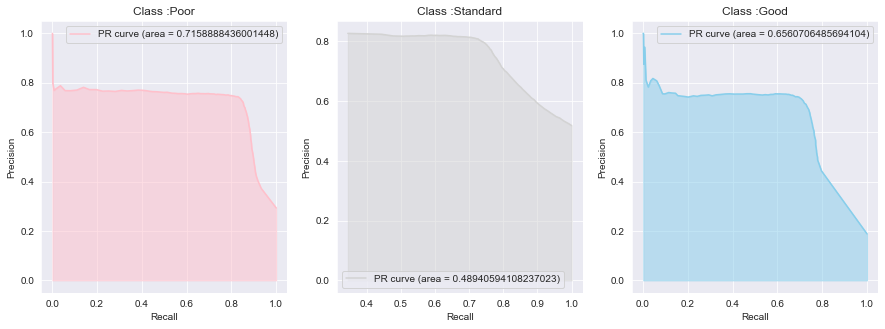

In [26]:
draw_pr_curve(x_test, y_test, rfc, overlap=False)

## Train - 1~4월 & Test - 5월

In [27]:
train_df, test_df = train_splitter(train, period=4)

time period is set as ====>  4
Size of Train:  (50000, 23)
Size of Test:  (12500, 23)


In [28]:
display(train_df)

,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576,1,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,26.822620,1,1,49.574949,21.465380,2,312.494089,2
1,576,2,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,31.944960,1,1,49.574949,21.465380,3,284.629162,2
2,576,3,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,28.609352,1,1,49.574949,21.465380,4,331.209863,2
3,576,4,3,12,7.509249,3.0,4.0,3.0,0,5.0,...,2,28.460148,31.377862,1,1,49.574949,21.465380,5,223.451310,2
6,1822,1,3,13,8.018950,2.0,4.0,6.0,0,3.0,...,2,24.597358,24.464031,1,1,18.816215,39.684018,5,470.690627,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74991,8346,4,3,1,7.565227,10.0,8.0,29.0,1,33.0,...,0,59.763701,30.614953,0,2,60.964772,34.662906,0,328.301277,1
74994,9254,1,3,9,8.119522,4.0,6.0,7.0,0,23.0,...,2,22.413835,32.991333,1,1,35.104023,24.028477,5,189.641080,0
74995,9254,2,3,9,8.119522,4.0,6.0,7.0,0,23.0,...,2,22.413835,29.135447,1,1,35.104023,24.028477,4,400.104466,1
74996,9254,3,3,9,8.119522,4.0,6.0,7.0,0,20.0,...,2,22.413835,39.323569,1,1,35.104023,24.028477,1,410.256158,0


In [29]:
target = 'Credit_Score'
# cat_col = ['Customer_ID', 'Month', 'Credit_Mix', 'Credit_History_Age',
#            'Payment_of_Min_Amount', 'Payment_Behaviour']

cat_col = ['Customer_ID', 'Credit_Mix', 'Credit_History_Age',
           'Payment_of_Min_Amount', 'Payment_Behaviour']

cat_dims = {}
for col in cat_col:
    cat_dims[col] = len(list(dfs[col].unique()))
    print(col, ': ', cat_dims[col])
cat_col_idx = [list(dfs.columns).index(col) for col in cat_col]
cat_col_dims = [cat_dims[col] for col in cat_col]
all_col_list = [col for col in dfs.columns if col !=target]

Customer_ID :  12500
Credit_Mix :  3
Credit_History_Age :  2
Payment_of_Min_Amount :  3
Payment_Behaviour :  6


In [30]:
x_train = train_df.loc[:, all_col_list].values
y_train = train_df.loc[:, target].values
x_test = test_df.loc[:, all_col_list].values
y_test = test_df.loc[:, target].values

In [31]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

In [32]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [33]:
y_pred = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)

In [34]:
y_proba = rfc.predict_proba(x_test)
y_proba

y_proba_train = rfc.predict_proba(x_train)
y_proba_train

array([[0.01, 0.07, 0.92],
       [0.04, 0.05, 0.91],
       [0.02, 0.04, 0.94],
       ...,
       [0.4 , 0.58, 0.02],
       [0.84, 0.1 , 0.06],
       [0.85, 0.08, 0.07]])

### Single Metrics

In [35]:
print('훈련 데이터 Accuracy : ', rfc.score(x_train, y_train))
print('평가 데이터 Accuracy: ', rfc.score(x_test, y_test))

훈련 데이터 Accuracy :  0.99998
평가 데이터 Accuracy:  0.78984


In [36]:
show_results(rfc, x_train, y_train, x_test, y_test)

Accuracy Score (Train):  0.99998
Accuracy Score (Test):  0.78984
Classification Report....: 
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      3712
           1       0.80      0.80      0.80      6478
           2       0.77      0.73      0.75      2310

    accuracy                           0.79     12500
   macro avg       0.78      0.78      0.78     12500
weighted avg       0.79      0.79      0.79     12500

Confusion Matrix...: 
[[2985  701   26]
 [ 794 5197  487]
 [  17  602 1691]]




================ Poor  vs other score ==================
   True_Posit :     2985
   True_Negat :     6888
   False_Posi :     0811
   False_Nega :     1816
       recall :   0.6217
    precision :   0.7864
     accuracy :   0.7898
     f1_score :   0.6944
confusion_mat
 [[2985 1816]
 [ 811 6888]] 



================ Standard  vs other score ==================
   True_Posit :     5197
   True_Negat :     4676
   False_Posi :     1303
   False_Nega :     1324
       recall :   0.7970
    precision :   0.7995
     accuracy :   0.7898
     f1_score :   0.7982
confusion_mat
 [[5197 1324]
 [1303 4676]] 



================ Good  vs other score ==================
   True_Posit :     1691
   True_Negat :     8182
   False_Posi :     0513
   False_Nega :     2114
       recall :   0.4444
    precision :   0.7672
     accuracy :   0.7898
     f1_score :   0.5628
confusion_mat
 [[1691 2114]
 [ 513 8182]] 



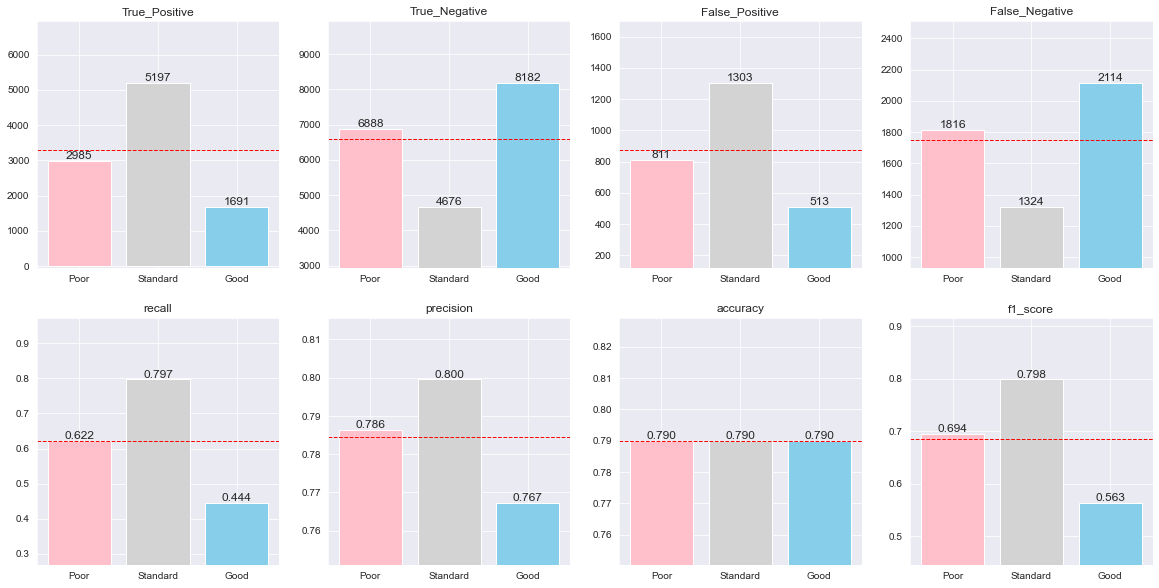

In [38]:
show_metrics(x_test, y_test, rfc)

### AUROC "ovr" 방법

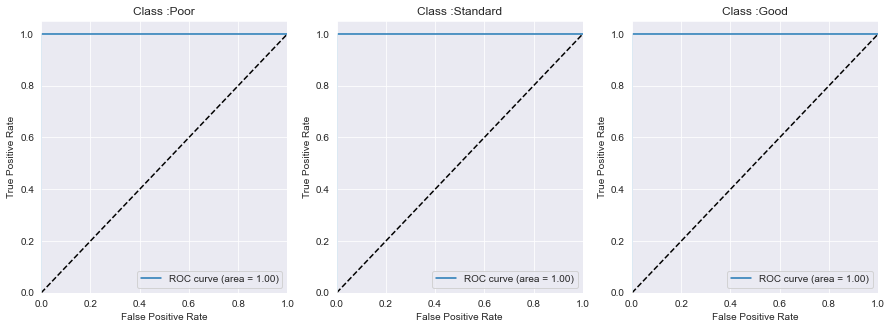

roc_auc_score:  1.0


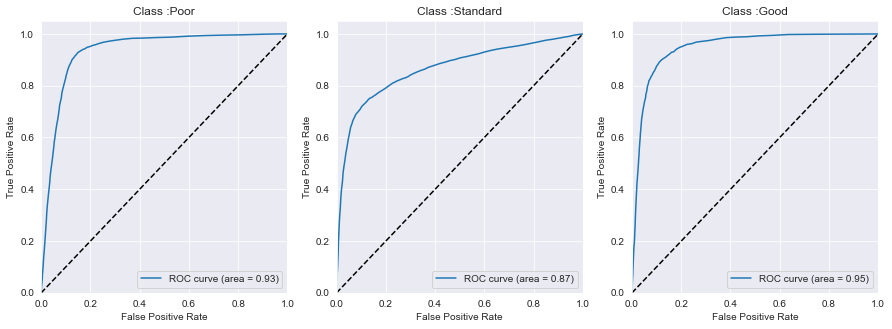

roc_auc_score:  0.9154604659805942


In [39]:
roc_curve_plot(x_train, y_train, rfc)

roc_curve_plot(x_test, y_test, rfc)

### AUROC OvO 방법

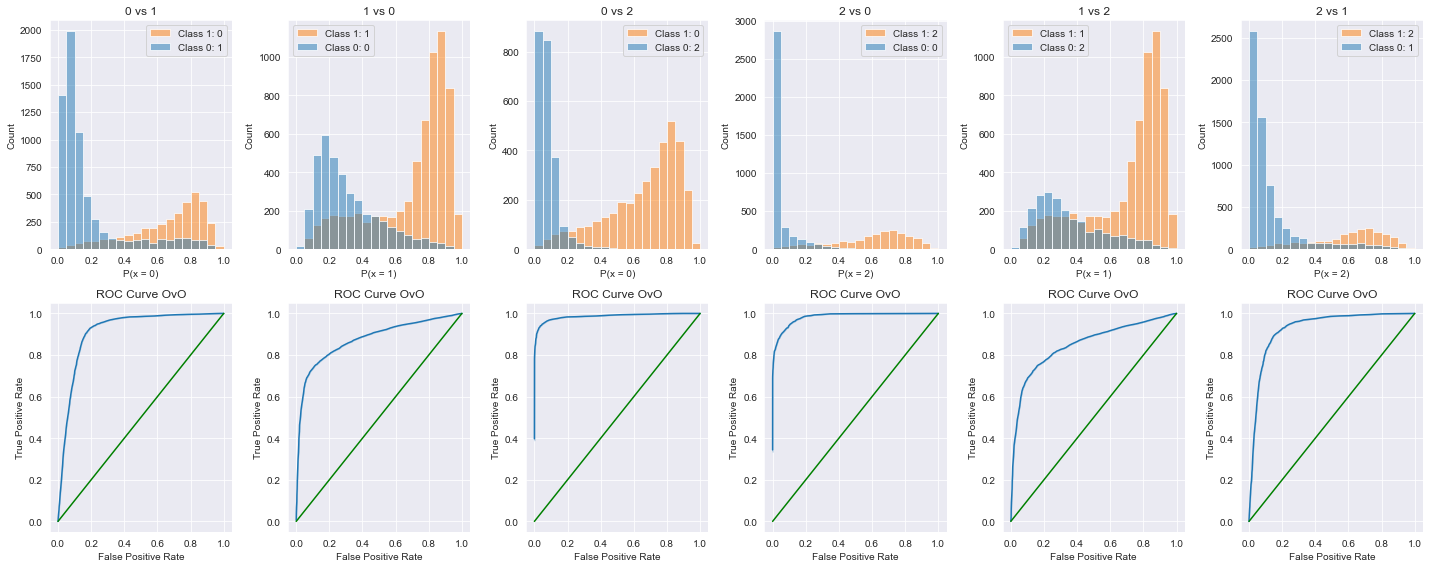

0 vs 1 ROC AUC OvO: 0.9146
1 vs 0 ROC AUC OvO: 0.8747
0 vs 2 ROC AUC OvO: 0.9863
2 vs 0 ROC AUC OvO: 0.9833
1 vs 2 ROC AUC OvO: 0.8498
2 vs 1 ROC AUC OvO: 0.9274
average ROC AUC OvO: 0.9227
sklearn method - average ROC AUC OvO: 0.9227


In [40]:
roc_auc_ovo_plot(x_test, y_test, rfc)

### AUPRC

Average precision score, micro-averaged over all classes: 0.8462


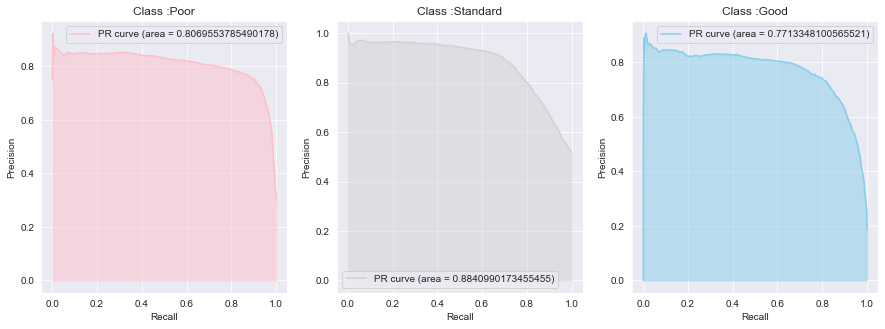

In [41]:
draw_pr_curve(x_test, y_test, rfc, overlap=False)

## Train - 1~5월 & Test - 6월

In [42]:
train_df, test_df = train_splitter(train, period=5)

time period is set as ====>  5
Size of Train:  (62500, 23)
Size of Test:  (12500, 23)


In [43]:
display(train_df)

,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576,1,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,26.822620,1,1,49.574949,21.465380,2,312.494089,2
1,576,2,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,31.944960,1,1,49.574949,21.465380,3,284.629162,2
2,576,3,3,12,7.509249,3.0,4.0,3.0,0,3.0,...,2,28.460148,28.609352,1,1,49.574949,21.465380,4,331.209863,2
3,576,4,3,12,7.509249,3.0,4.0,3.0,0,5.0,...,2,28.460148,31.377862,1,1,49.574949,21.465380,5,223.451310,2
4,576,5,3,12,7.509249,3.0,4.0,3.0,0,6.0,...,2,28.460148,24.797347,1,1,49.574949,21.465380,1,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74994,9254,1,3,9,8.119522,4.0,6.0,7.0,0,23.0,...,2,22.413835,32.991333,1,1,35.104023,24.028477,5,189.641080,0
74995,9254,2,3,9,8.119522,4.0,6.0,7.0,0,23.0,...,2,22.413835,29.135447,1,1,35.104023,24.028477,4,400.104466,1
74996,9254,3,3,9,8.119522,4.0,6.0,7.0,0,20.0,...,2,22.413835,39.323569,1,1,35.104023,24.028477,1,410.256158,0
74997,9254,4,3,9,8.119522,4.0,6.0,7.0,0,23.0,...,2,22.413835,34.663572,1,1,35.104023,24.028477,0,479.866228,0


In [44]:
target = 'Credit_Score'
# cat_col = ['Customer_ID', 'Month', 'Credit_Mix', 'Credit_History_Age',
#            'Payment_of_Min_Amount', 'Payment_Behaviour']

cat_col = ['Customer_ID', 'Credit_Mix', 'Credit_History_Age',
           'Payment_of_Min_Amount', 'Payment_Behaviour']

cat_dims = {}
for col in cat_col:
    cat_dims[col] = len(list(dfs[col].unique()))
    print(col, ': ', cat_dims[col])
cat_col_idx = [list(dfs.columns).index(col) for col in cat_col]
cat_col_dims = [cat_dims[col] for col in cat_col]
all_col_list = [col for col in dfs.columns if col !=target]

Customer_ID :  12500
Credit_Mix :  3
Credit_History_Age :  2
Payment_of_Min_Amount :  3
Payment_Behaviour :  6


In [45]:
x_train = train_df.loc[:, all_col_list].values
y_train = train_df.loc[:, target].values
x_test = test_df.loc[:, all_col_list].values
y_test = test_df.loc[:, target].values

In [46]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

In [47]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [48]:
y_pred = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)

In [49]:
y_proba = rfc.predict_proba(x_test)
y_proba

y_proba_train = rfc.predict_proba(x_train)
y_proba_train

array([[0.02, 0.07, 0.91],
       [0.01, 0.06, 0.93],
       [0.  , 0.05, 0.95],
       ...,
       [0.9 , 0.09, 0.01],
       [0.91, 0.08, 0.01],
       [0.88, 0.09, 0.03]])

### Single Metrics

In [50]:
print('훈련 데이터 Accuracy : ', rfc.score(x_train, y_train))
print('평가 데이터 Accuracy: ', rfc.score(x_test, y_test))

훈련 데이터 Accuracy :  1.0
평가 데이터 Accuracy:  0.8264


In [51]:
show_results(rfc, x_train, y_train, x_test, y_test)

Accuracy Score (Train):  1.0
Accuracy Score (Test):  0.8264
Classification Report....: 
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      3728
           1       0.83      0.83      0.83      6410
           2       0.82      0.78      0.80      2362

    accuracy                           0.83     12500
   macro avg       0.82      0.82      0.82     12500
weighted avg       0.83      0.83      0.83     12500

Confusion Matrix...: 
[[3164  544   20]
 [ 686 5335  389]
 [  13  518 1831]]


In [52]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      3728
           1       0.83      0.83      0.83      6410
           2       0.82      0.78      0.80      2362

    accuracy                           0.83     12500
   macro avg       0.82      0.82      0.82     12500
weighted avg       0.83      0.83      0.83     12500





================ Poor  vs other score ==================
   True_Posit :     3164
   True_Negat :     7166
   False_Posi :     0699
   False_Nega :     1471
       recall :   0.6826
    precision :   0.8191
     accuracy :   0.8264
     f1_score :   0.7446
confusion_mat
 [[3164 1471]
 [ 699 7166]] 



================ Standard  vs other score ==================
   True_Posit :     5335
   True_Negat :     4995
   False_Posi :     1062
   False_Nega :     1108
       recall :   0.8280
    precision :   0.8340
     accuracy :   0.8264
     f1_score :   0.8310
confusion_mat
 [[5335 1108]
 [1062 4995]] 



================ Good  vs other score ==================
   True_Posit :     1831
   True_Negat :     8499
   False_Posi :     0409
   False_Nega :     1761
       recall :   0.5097
    precision :   0.8174
     accuracy :   0.8264
     f1_score :   0.6279
confusion_mat
 [[1831 1761]
 [ 409 8499]] 



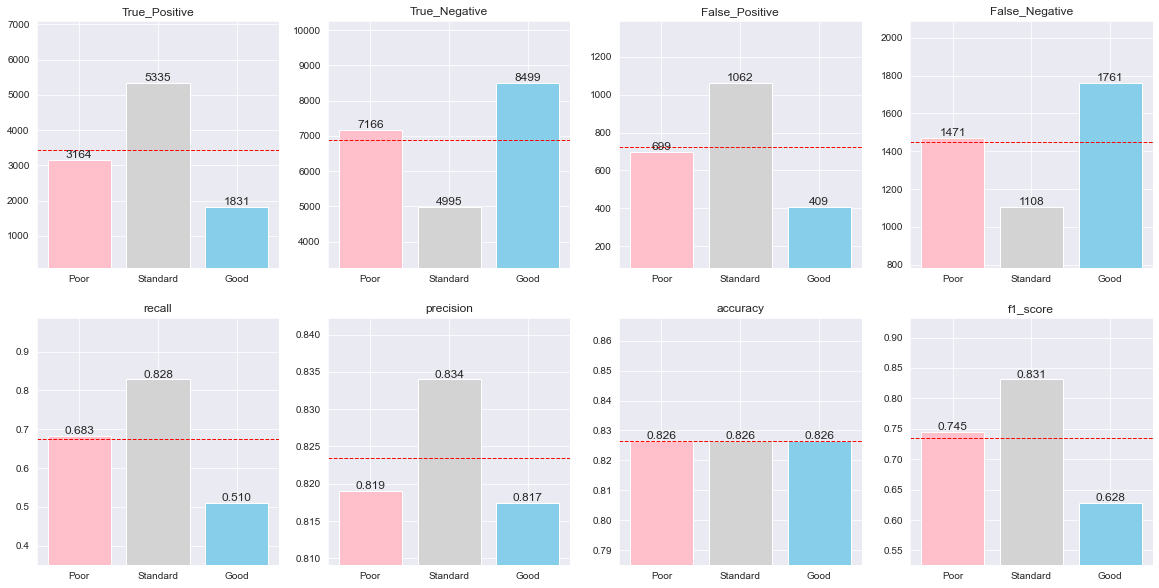

In [53]:
show_metrics(x_test, y_test, rfc)

### AUROC "ovr" 방법

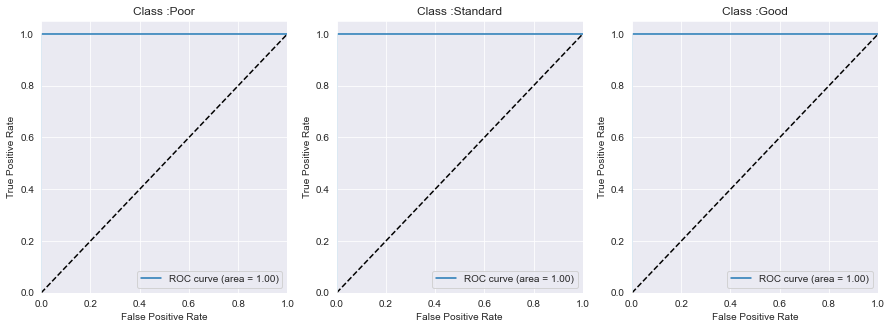

roc_auc_score:  1.0


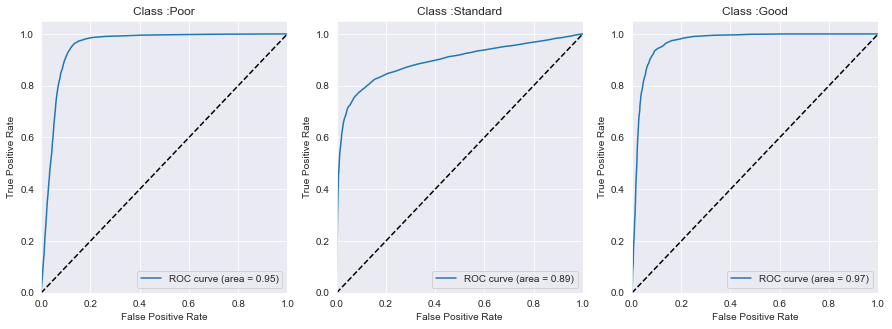

roc_auc_score:  0.9373015633768197


In [54]:
roc_curve_plot(x_train, y_train, rfc)

roc_curve_plot(x_test, y_test, rfc)

### AUROC OvO 방법

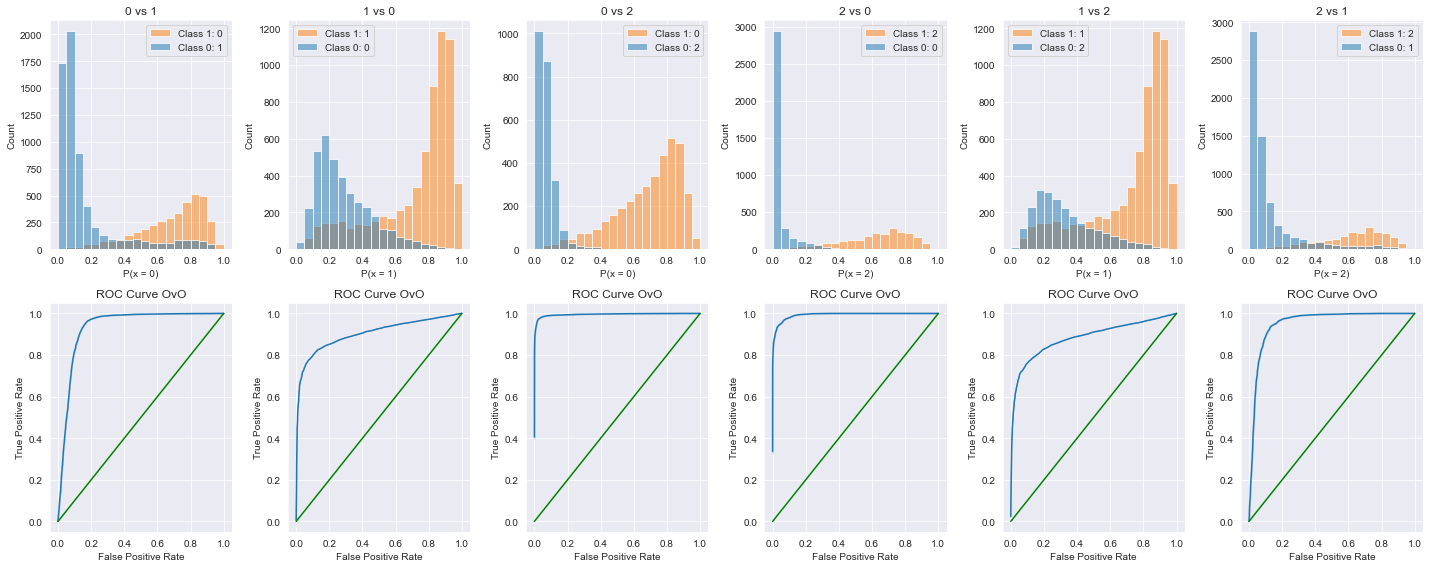

0 vs 1 ROC AUC OvO: 0.9343
1 vs 0 ROC AUC OvO: 0.9023
0 vs 2 ROC AUC OvO: 0.9950
2 vs 0 ROC AUC OvO: 0.9928
1 vs 2 ROC AUC OvO: 0.8826
2 vs 1 ROC AUC OvO: 0.9513
average ROC AUC OvO: 0.9431
sklearn method - average ROC AUC OvO: 0.9431


In [55]:
roc_auc_ovo_plot(x_test, y_test, rfc)

### AUPRC

Average precision score, micro-averaged over all classes: 0.8853


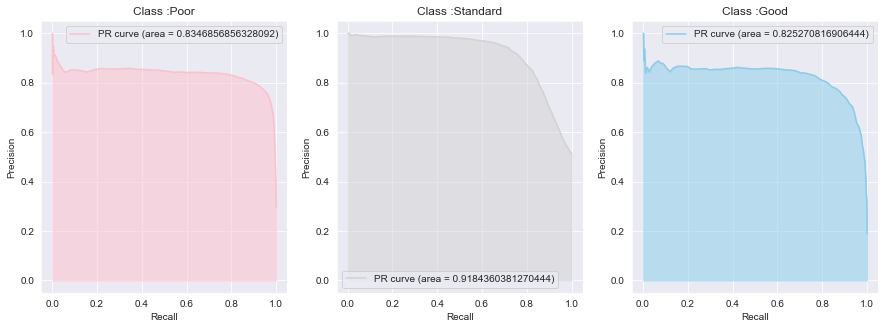

In [56]:
draw_pr_curve(x_test, y_test, rfc, overlap=False)

## Train - 1~6월 & Test - 7월

In [57]:
train_df, test_df = train_splitter(dfs, period=6)

time period is set as ====>  6
Size of Train:  (75000, 22)
Size of Test:  (12500, 22)


In [58]:
display(train_df)

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576,1,1,7.509249,3.0,4.0,3.0,0,3.0,7.0,...,2,28.460148,26.822620,1,1,49.574949,21.465380,2,312.494089,2
1,576,2,1,7.509249,3.0,4.0,3.0,0,3.0,4.0,...,2,28.460148,31.944960,1,1,49.574949,21.465380,3,284.629162,2
2,576,3,1,7.509249,3.0,4.0,3.0,0,3.0,7.0,...,2,28.460148,28.609352,1,1,49.574949,21.465380,4,331.209863,2
3,576,4,1,7.509249,3.0,4.0,3.0,0,5.0,4.0,...,2,28.460148,31.377862,1,1,49.574949,21.465380,5,223.451310,2
4,576,5,1,7.509249,3.0,4.0,3.0,0,6.0,4.0,...,2,28.460148,24.797347,1,1,49.574949,21.465380,1,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,9254,2,1,8.119522,4.0,6.0,7.0,0,23.0,6.0,...,2,22.413835,29.135447,1,1,35.104023,24.028477,4,400.104466,1
99994,9254,3,1,8.119522,4.0,6.0,7.0,0,20.0,6.0,...,2,22.413835,39.323569,1,1,35.104023,24.028477,1,410.256158,0
99995,9254,4,1,8.119522,4.0,6.0,7.0,0,23.0,7.0,...,2,22.413835,34.663572,1,1,35.104023,24.028477,0,479.866228,0
99996,9254,5,1,8.119522,4.0,6.0,7.0,0,18.0,7.0,...,2,22.413835,40.565631,1,1,35.104023,24.028477,1,496.651610,0


In [72]:
test_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,576,7,1,7.509249,3.0,4.0,3.0,0,3.0,8.0,...,2,28.460148,22.537593,1,1,49.574949,21.465380,5,244.565317,2
14,1822,7,1,8.018950,2.0,4.0,6.0,0,3.0,4.0,...,2,24.597358,31.131702,1,0,18.816215,39.684018,1,464.880678,2
22,2641,7,1,9.408143,1.0,5.0,8.0,0,8.0,6.0,...,2,36.097230,38.068624,1,1,246.992319,168.413703,2,968.555517,1
30,11587,7,2,7.868059,2.0,5.0,4.0,0,5.0,6.0,...,2,25.148757,26.056395,1,1,16.415452,29.393311,3,443.549957,1
38,1533,7,1,7.956235,7.0,5.0,5.0,0,10.0,15.0,...,1,30.722305,26.263823,1,2,0.000000,37.643638,5,394.318934,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99966,3229,7,0,8.151424,0.0,4.0,6.0,0,14.0,0.0,...,2,32.855441,35.123480,1,1,34.975457,31.193919,4,350.982329,2
99974,696,7,1,7.331734,1.0,1.0,5.0,0,1.0,0.0,...,2,29.952629,36.166925,1,1,41.113561,40.893052,5,340.684834,2
99982,10985,7,2,8.038192,1.0,4.0,5.0,0,7.0,13.0,...,2,24.912647,38.850680,1,1,84.205949,42.935566,5,412.669312,2
99990,8346,7,1,7.565227,10.0,8.0,29.0,1,33.0,25.0,...,0,59.763701,25.123535,0,2,60.964772,34.662906,3,228.750392,1


In [59]:
target = 'Credit_Score'
# cat_col = ['Customer_ID', 'Month', 'Credit_Mix', 'Credit_History_Age',
#            'Payment_of_Min_Amount', 'Payment_Behaviour']

cat_col = ['Customer_ID', 'Credit_Mix', 'Credit_History_Age',
           'Payment_of_Min_Amount', 'Payment_Behaviour']

cat_dims = {}
for col in cat_col:
    cat_dims[col] = len(list(dfs[col].unique()))
    print(col, ': ', cat_dims[col])
cat_col_idx = [list(dfs.columns).index(col) for col in cat_col]
cat_col_dims = [cat_dims[col] for col in cat_col]
all_col_list = [col for col in dfs.columns if col !=target]

Customer_ID :  12500
Credit_Mix :  3
Credit_History_Age :  2
Payment_of_Min_Amount :  3
Payment_Behaviour :  6


In [60]:
x_train = train_df.loc[:, all_col_list].values
y_train = train_df.loc[:, target].values
x_test = test_df.loc[:, all_col_list].values
y_test = test_df.loc[:, target].values

In [61]:
x_test

array([[5.76000000e+02, 7.00000000e+00, 1.00000000e+00, ...,
        2.14653803e+01, 5.00000000e+00, 2.44565317e+02],
       [1.82200000e+03, 7.00000000e+00, 1.00000000e+00, ...,
        3.96840184e+01, 1.00000000e+00, 4.64880678e+02],
       [2.64100000e+03, 7.00000000e+00, 1.00000000e+00, ...,
        1.68413703e+02, 2.00000000e+00, 9.68555517e+02],
       ...,
       [1.09850000e+04, 7.00000000e+00, 2.00000000e+00, ...,
        4.29355658e+01, 5.00000000e+00, 4.12669312e+02],
       [8.34600000e+03, 7.00000000e+00, 1.00000000e+00, ...,
        3.46629061e+01, 3.00000000e+00, 2.28750392e+02],
       [9.25400000e+03, 7.00000000e+00, 1.00000000e+00, ...,
        2.40284774e+01, 3.00000000e+00, 3.19164979e+02]])

In [62]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

In [63]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [64]:
y_pred = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)

In [65]:
y_proba = rfc.predict_proba(x_test)
y_proba

y_proba_train = rfc.predict_proba(x_train)
y_proba_train

array([[0.  , 0.08, 0.92],
       [0.02, 0.08, 0.9 ],
       [0.02, 0.09, 0.89],
       ...,
       [0.91, 0.08, 0.01],
       [0.89, 0.05, 0.06],
       [0.89, 0.08, 0.03]])

### Single Metrics

In [66]:
print('훈련 데이터 Accuracy : ', rfc.score(x_train, y_train))
print('평가 데이터 Accuracy: ', rfc.score(x_test, y_test))

훈련 데이터 Accuracy :  1.0
평가 데이터 Accuracy:  0.73728


In [73]:
show_results(rfc, x_train,y_train, x_test, y_test)

Accuracy Score (Train):  1.0
Accuracy Score (Test):  0.73728
Classification Report....: 
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      3614
           1       0.75      0.74      0.75      6475
           2       0.70      0.66      0.68      2411

    accuracy                           0.74     12500
   macro avg       0.73      0.73      0.73     12500
weighted avg       0.74      0.74      0.74     12500

Confusion Matrix...: 
[[2841  762   11]
 [1036 4772  667]
 [  12  796 1603]]




================ Poor  vs other score ==================
   True_Posit :     2841
   True_Negat :     6375
   False_Posi :     1048
   False_Nega :     2236
       recall :   0.5596
    precision :   0.7305
     accuracy :   0.7373
     f1_score :   0.6337
confusion_mat
 [[2841 2236]
 [1048 6375]] 



================ Standard  vs other score ==================
   True_Posit :     4772
   True_Negat :     4444
   False_Posi :     1558
   False_Nega :     1726
       recall :   0.7344
    precision :   0.7539
     accuracy :   0.7373
     f1_score :   0.7440
confusion_mat
 [[4772 1726]
 [1558 4444]] 



================ Good  vs other score ==================
   True_Posit :     1603
   True_Negat :     7613
   False_Posi :     0678
   False_Nega :     2606
       recall :   0.3809
    precision :   0.7028
     accuracy :   0.7373
     f1_score :   0.4940
confusion_mat
 [[1603 2606]
 [ 678 7613]] 



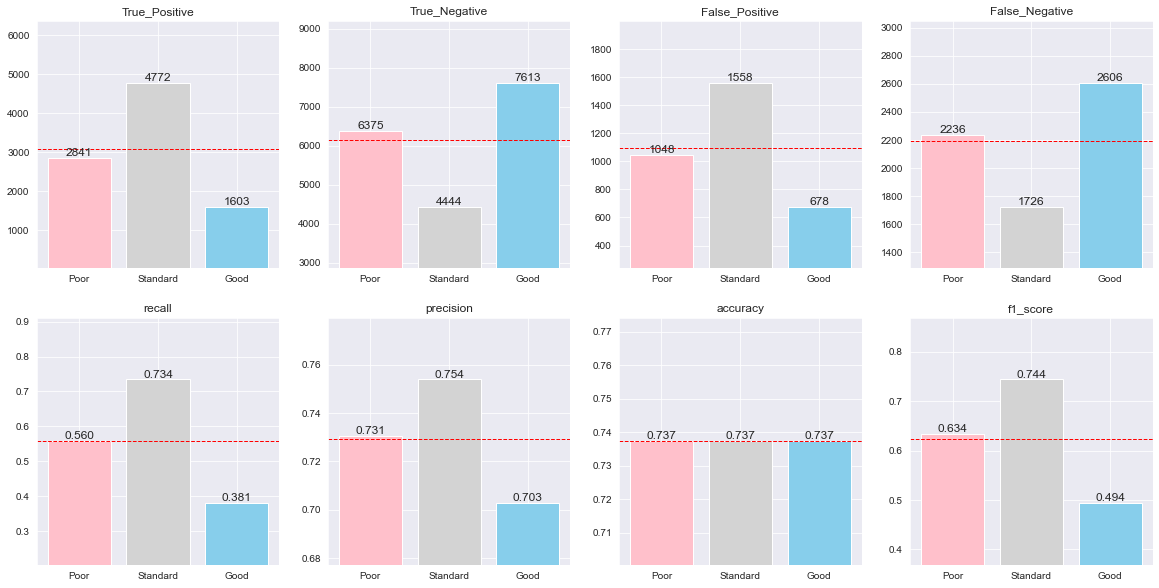

In [68]:
show_metrics(x_test, y_test, rfc)

### AUROC "ovr" 방법

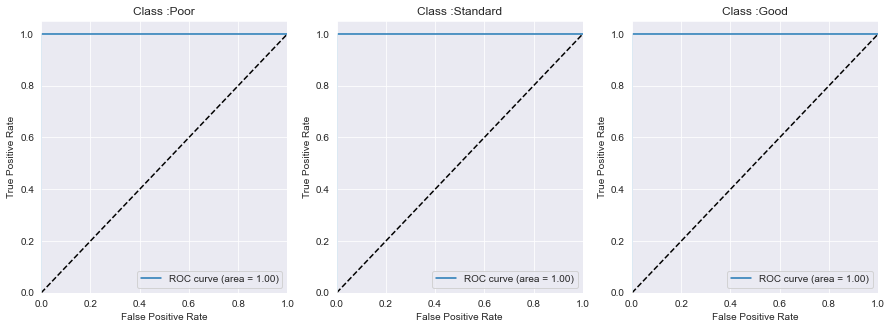

roc_auc_score:  1.0


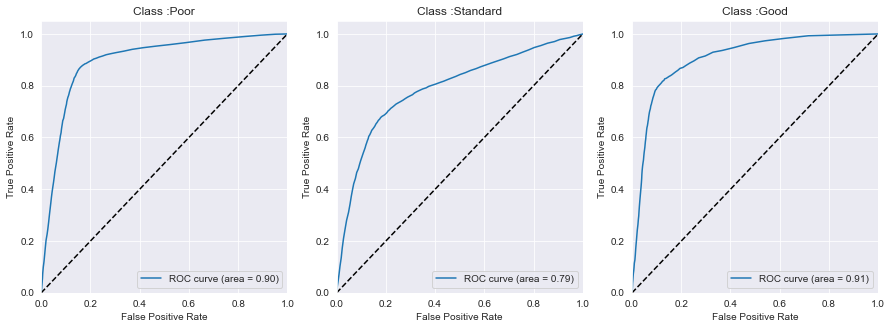

roc_auc_score:  0.8639790808384875


In [69]:
roc_curve_plot(x_train, y_train, rfc)

roc_curve_plot(x_test, y_test, rfc)

### AUROC OvO 방법

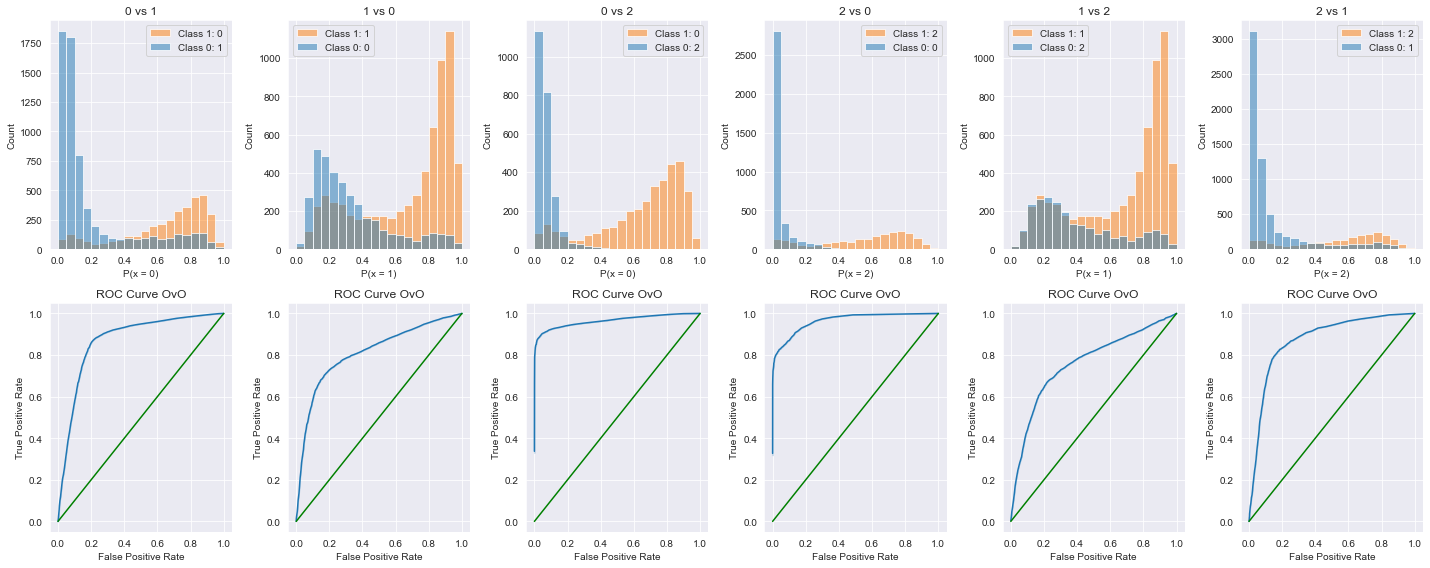

0 vs 1 ROC AUC OvO: 0.8703
1 vs 0 ROC AUC OvO: 0.8108
0 vs 2 ROC AUC OvO: 0.9648
2 vs 0 ROC AUC OvO: 0.9646
1 vs 2 ROC AUC OvO: 0.7597
2 vs 1 ROC AUC OvO: 0.8728
average ROC AUC OvO: 0.8738
sklearn method - average ROC AUC OvO: 0.8738


In [70]:
roc_auc_ovo_plot(x_test, y_test, rfc)

### AUPRC

Average precision score, micro-averaged over all classes: 0.7661


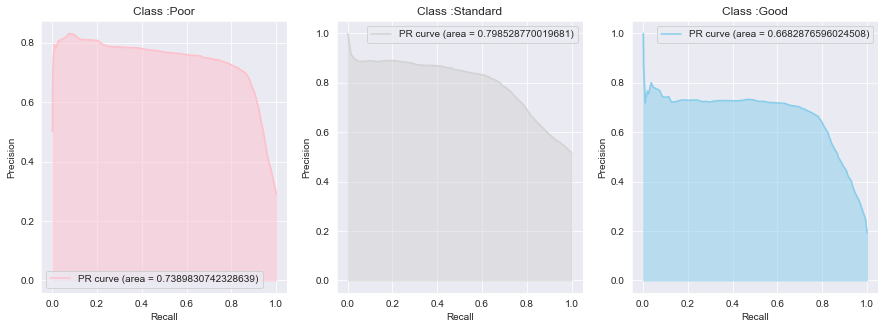

In [71]:
draw_pr_curve(x_test, y_test, rfc, overlap=False)